In [155]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

In [170]:
LIST_OF_STAGE_III_COUNTRIES = pd.read_csv("../../../data/UN/fertility/countries_in_stage_III.csv")
TFR_OF_STAGE_III_COUNTRIES = pd.read_csv("../../../data/UN/fertility/TFR_per_country_stage_III.csv")

MC_SIMULATIONS_PREFIX = "./MC_fertility_"

REGION_OF_INTEREST = "EUROPE"
TFR_OF_INTEREST = TFR_OF_STAGE_III_COUNTRIES[TFR_OF_STAGE_III_COUNTRIES["Region"] == REGION_OF_INTEREST]

MC_SIMULATIONS_FILE = MC_SIMULATIONS_PREFIX + REGION_OF_INTEREST + ".pkl"
with open(MC_SIMULATIONS_FILE, "rb") as handle:
    MC_SIMULATIONS = pickle.load(handle)

N_samples = len(MC_SIMULATIONS)
simulation_len = len(MC_SIMULATIONS[0].path) - 1
simulation_start = TFR_OF_INTEREST['Year'].iloc[-1]
simulation_end = simulation_start + simulation_len + 1
simulation_window = np.arange(simulation_start, simulation_end, 1)

MC_SIMULATIONS_path = [MC_SIMULATIONS[i].path[:, 0] for i in range(N_samples)]

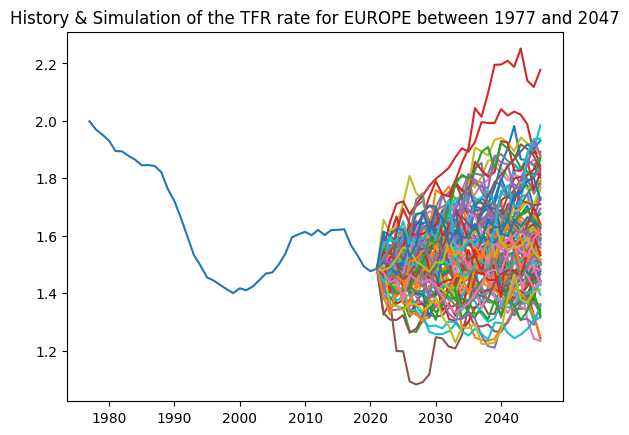

In [172]:
plt.plot(TFR_OF_INTEREST['Year'], TFR_OF_INTEREST['TFR'])
for path in MC_SIMULATIONS_path:
    plt.plot(simulation_window, path[:])
plt.title(
    f"History & Simulation of the TFR rate for {REGION_OF_INTEREST} between {int(TFR_OF_INTEREST['Year'].iloc[0])} and {int(simulation_end)}")
plt.show()

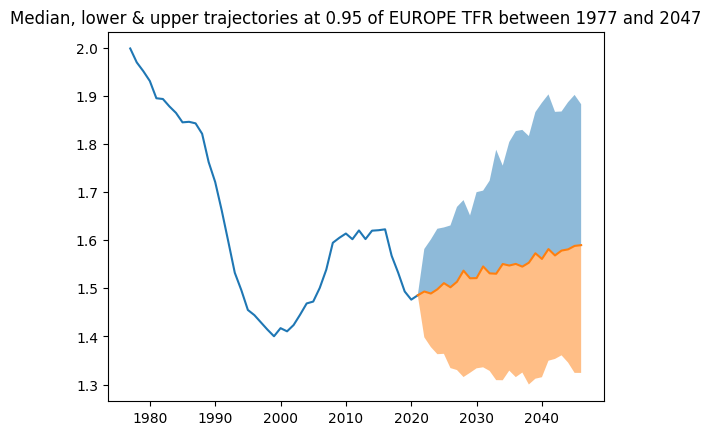

In [173]:
plt.plot(TFR_OF_INTEREST['Year'], TFR_OF_INTEREST['TFR'])
median_trajectory = np.median(MC_SIMULATIONS_path, axis=0)
upper_quantile_95 = np.quantile(MC_SIMULATIONS_path, 0.95, axis=0)
lower_quantile_005 = np.quantile(MC_SIMULATIONS_path, 0.05, axis=0)
plt.plot(simulation_window, median_trajectory)
plt.title(
    f"Median, lower & upper trajectories at 0.95 of {REGION_OF_INTEREST} TFR between {int(TFR_OF_INTEREST['Year'].iloc[0])} and {int(simulation_end)}")
plt.fill_between(simulation_window, median_trajectory, upper_quantile_95, alpha=0.5)
plt.fill_between(simulation_window, median_trajectory, lower_quantile_005, alpha=0.5)
plt.show()

In [174]:
for i in range(N_samples):
    print(i, MC_SIMULATIONS_path[i][-1])

0 1.5715149439508436
1 1.5722136018226465
2 1.8426129647534801
3 1.782334965669184
4 1.324500686324527
5 1.7338346161106843
6 1.5405127580741105
7 1.7360489743969647
8 1.3947903719999137
9 1.7647757647376152
10 1.54611863582063
11 1.7913214570434444
12 1.5187194545149096
13 1.500239825700318
14 1.4996039740905809
15 1.359927455563098
16 1.428122147540329
17 1.7923846480219434
18 1.4435271239133687
19 1.6038784848926457
20 1.5947532243433098
21 1.7294066043274443
22 1.5016154759839506
23 1.4427272894769028
24 1.590589471380501
25 1.8610084238526554
26 1.6943224683737588
27 1.6014074511170953
28 1.4332599243642565
29 1.676967258183839
30 1.6293605148456918
31 1.5070059120583674
32 1.8918605066681466
33 1.5667227904189158
34 1.4666133451325474
35 1.2340472929668158
36 1.557695709842432
37 1.6378915206182652
38 1.3158966113849264
39 1.8113656139021639
40 1.5972844365718661
41 1.4434284784274722
42 1.5064224289159427
43 1.6239806023509407
44 1.2424421491095123
45 1.51479783364114
46 1.58885

(array([ 3.,  3.,  0.,  6.,  4., 10., 14., 12.,  5., 11.,  6.,  2.,  8.,
         3.,  1.,  2.,  4.,  1.,  2.,  2.,  0.,  0.,  0.,  0.,  1.]),
 array([0.02937108, 0.03127359, 0.03317611, 0.03507862, 0.03698114,
        0.03888365, 0.04078617, 0.04268868, 0.0445912 , 0.04649371,
        0.04839623, 0.05029874, 0.05220126, 0.05410378, 0.05600629,
        0.05790881, 0.05981132, 0.06171384, 0.06361635, 0.06551887,
        0.06742138, 0.0693239 , 0.07122641, 0.07312893, 0.07503144,
        0.07693396]),
 <BarContainer object of 25 artists>)

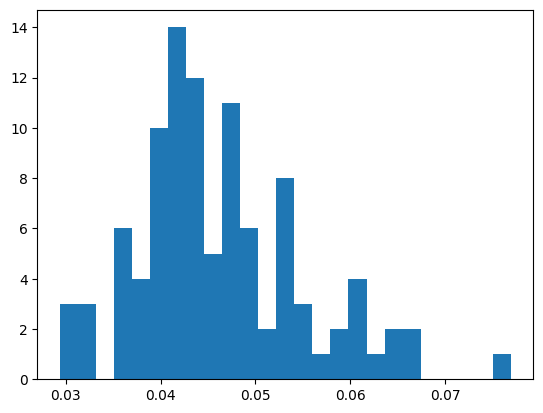

In [176]:
plt.hist([MC_SIMULATIONS[i].sigma_b for i in range(N_samples)], bins=25)